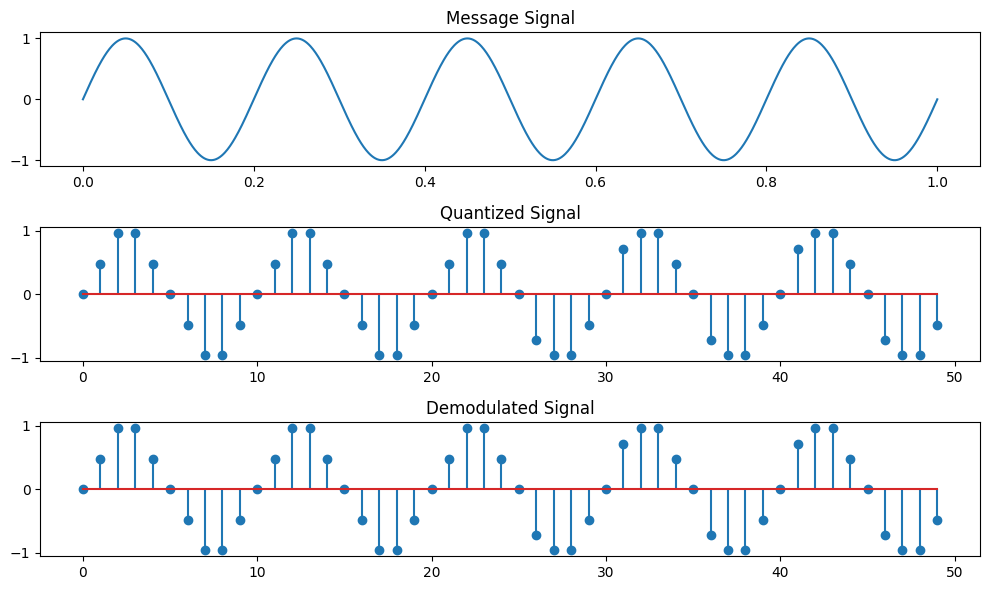

PCM encoded values: [ 0  2  4  4  2  0 -2 -4 -4 -2]


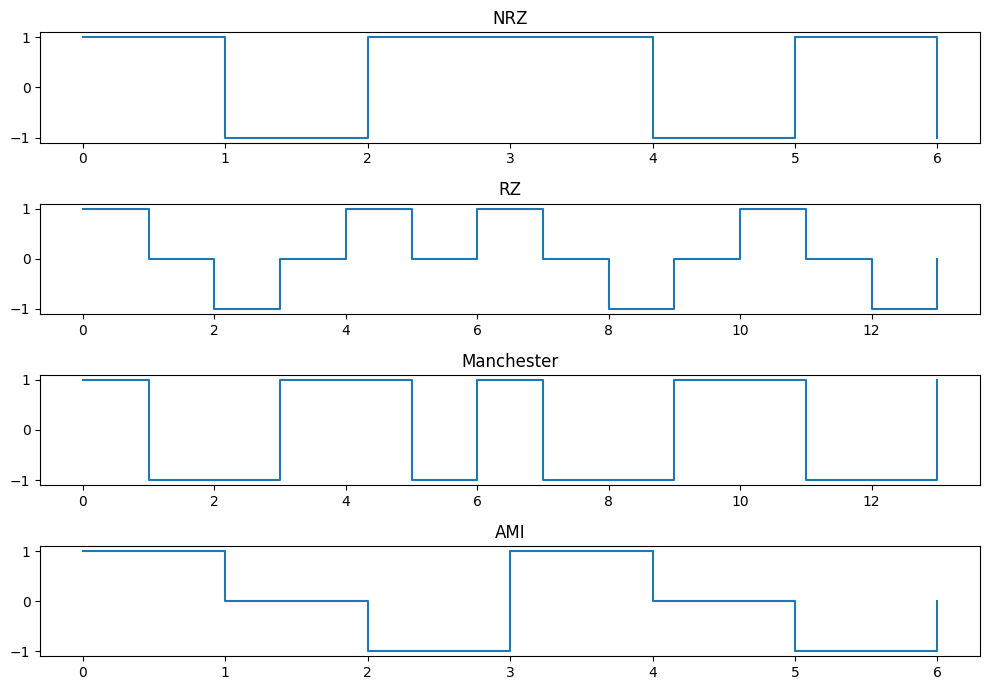

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ======================
# PCM MODULATION
# ======================

t = np.linspace(0, 1, 1000)
message = np.sin(2 * np.pi * 5 * t)

# Sampling
samples = message[::20]

# Quantization
L = 8
q = (max(samples) - min(samples)) / L
quantized = np.round(samples / q) * q

# Encoding
encoded = (quantized / q).astype(int)

# Decoding
demodulated = encoded * q

# ======================
# PCM PLOTS
# ======================

plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.plot(t, message)
plt.title("Message Signal")

plt.subplot(3,1,2)
plt.stem(quantized)
plt.title("Quantized Signal")

plt.subplot(3,1,3)
plt.stem(demodulated)
plt.title("Demodulated Signal")

plt.tight_layout()
plt.show()

print("PCM encoded values:", encoded[:10])

# ======================
# LINE CODING
# ======================

bits = [1,0,1,1,0,1,0]

# NRZ
nrz = [1 if b else -1 for b in bits]

# RZ
rz = []
for b in bits:
    rz += [1,0] if b else [-1,0]

# Manchester
man = []
for b in bits:
    man += [1,-1] if b else [-1,1]

# AMI
ami = []
p = 1
for b in bits:
    if b:
        ami.append(p)
        p *= -1
    else:
        ami.append(0)

# ======================
# LINE CODING PLOTS
# ======================

plt.figure(figsize=(10,7))

plt.subplot(4,1,1)
plt.step(range(len(nrz)), nrz, where='post')
plt.title("NRZ")

plt.subplot(4,1,2)
plt.step(range(len(rz)), rz, where='post')
plt.title("RZ")

plt.subplot(4,1,3)
plt.step(range(len(man)), man, where='post')
plt.title("Manchester")

plt.subplot(4,1,4)
plt.step(range(len(ami)), ami, where='post')
plt.title("AMI")

plt.tight_layout()
plt.show()